In [1]:
import numpy as np
import pandas as pd
import ipyplot
import plotly.express as px
from sklearn.linear_model import LinearRegression
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statistics
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.transforms as mtransforms
from IPython.display import Image, display

from functions import ratio_correction_functions

import os
import shutil

## Figure 1


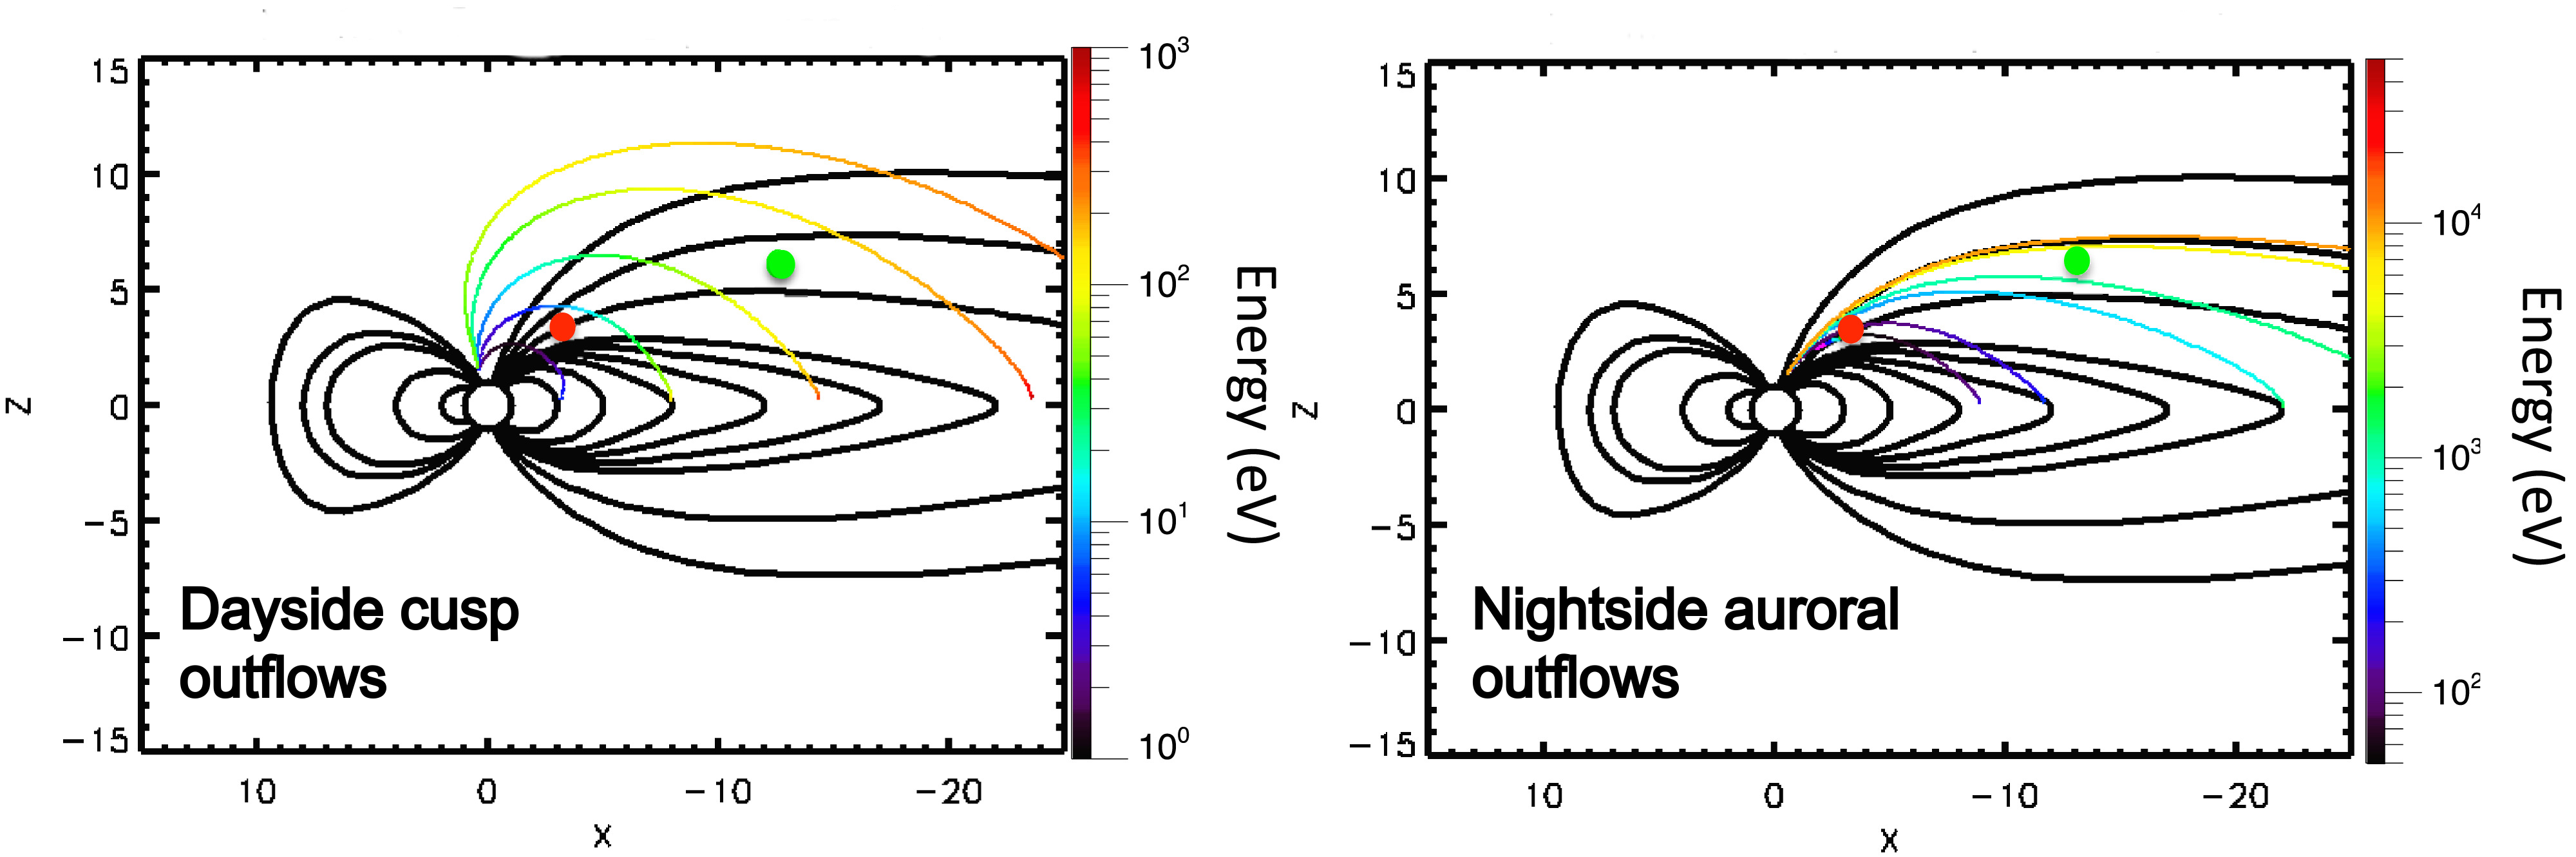

In [2]:
figure1_png_path ="/home/jliao/Downloads/ion_composition_figures/figure1/figure1.png"

display(Image(filename=figure1_png_path))

Figure 1. Simulated velocity filter effect for ions from dayside cusp and nightside aurora. Adapted from [Kistler et al. 2019]


## Figure 2

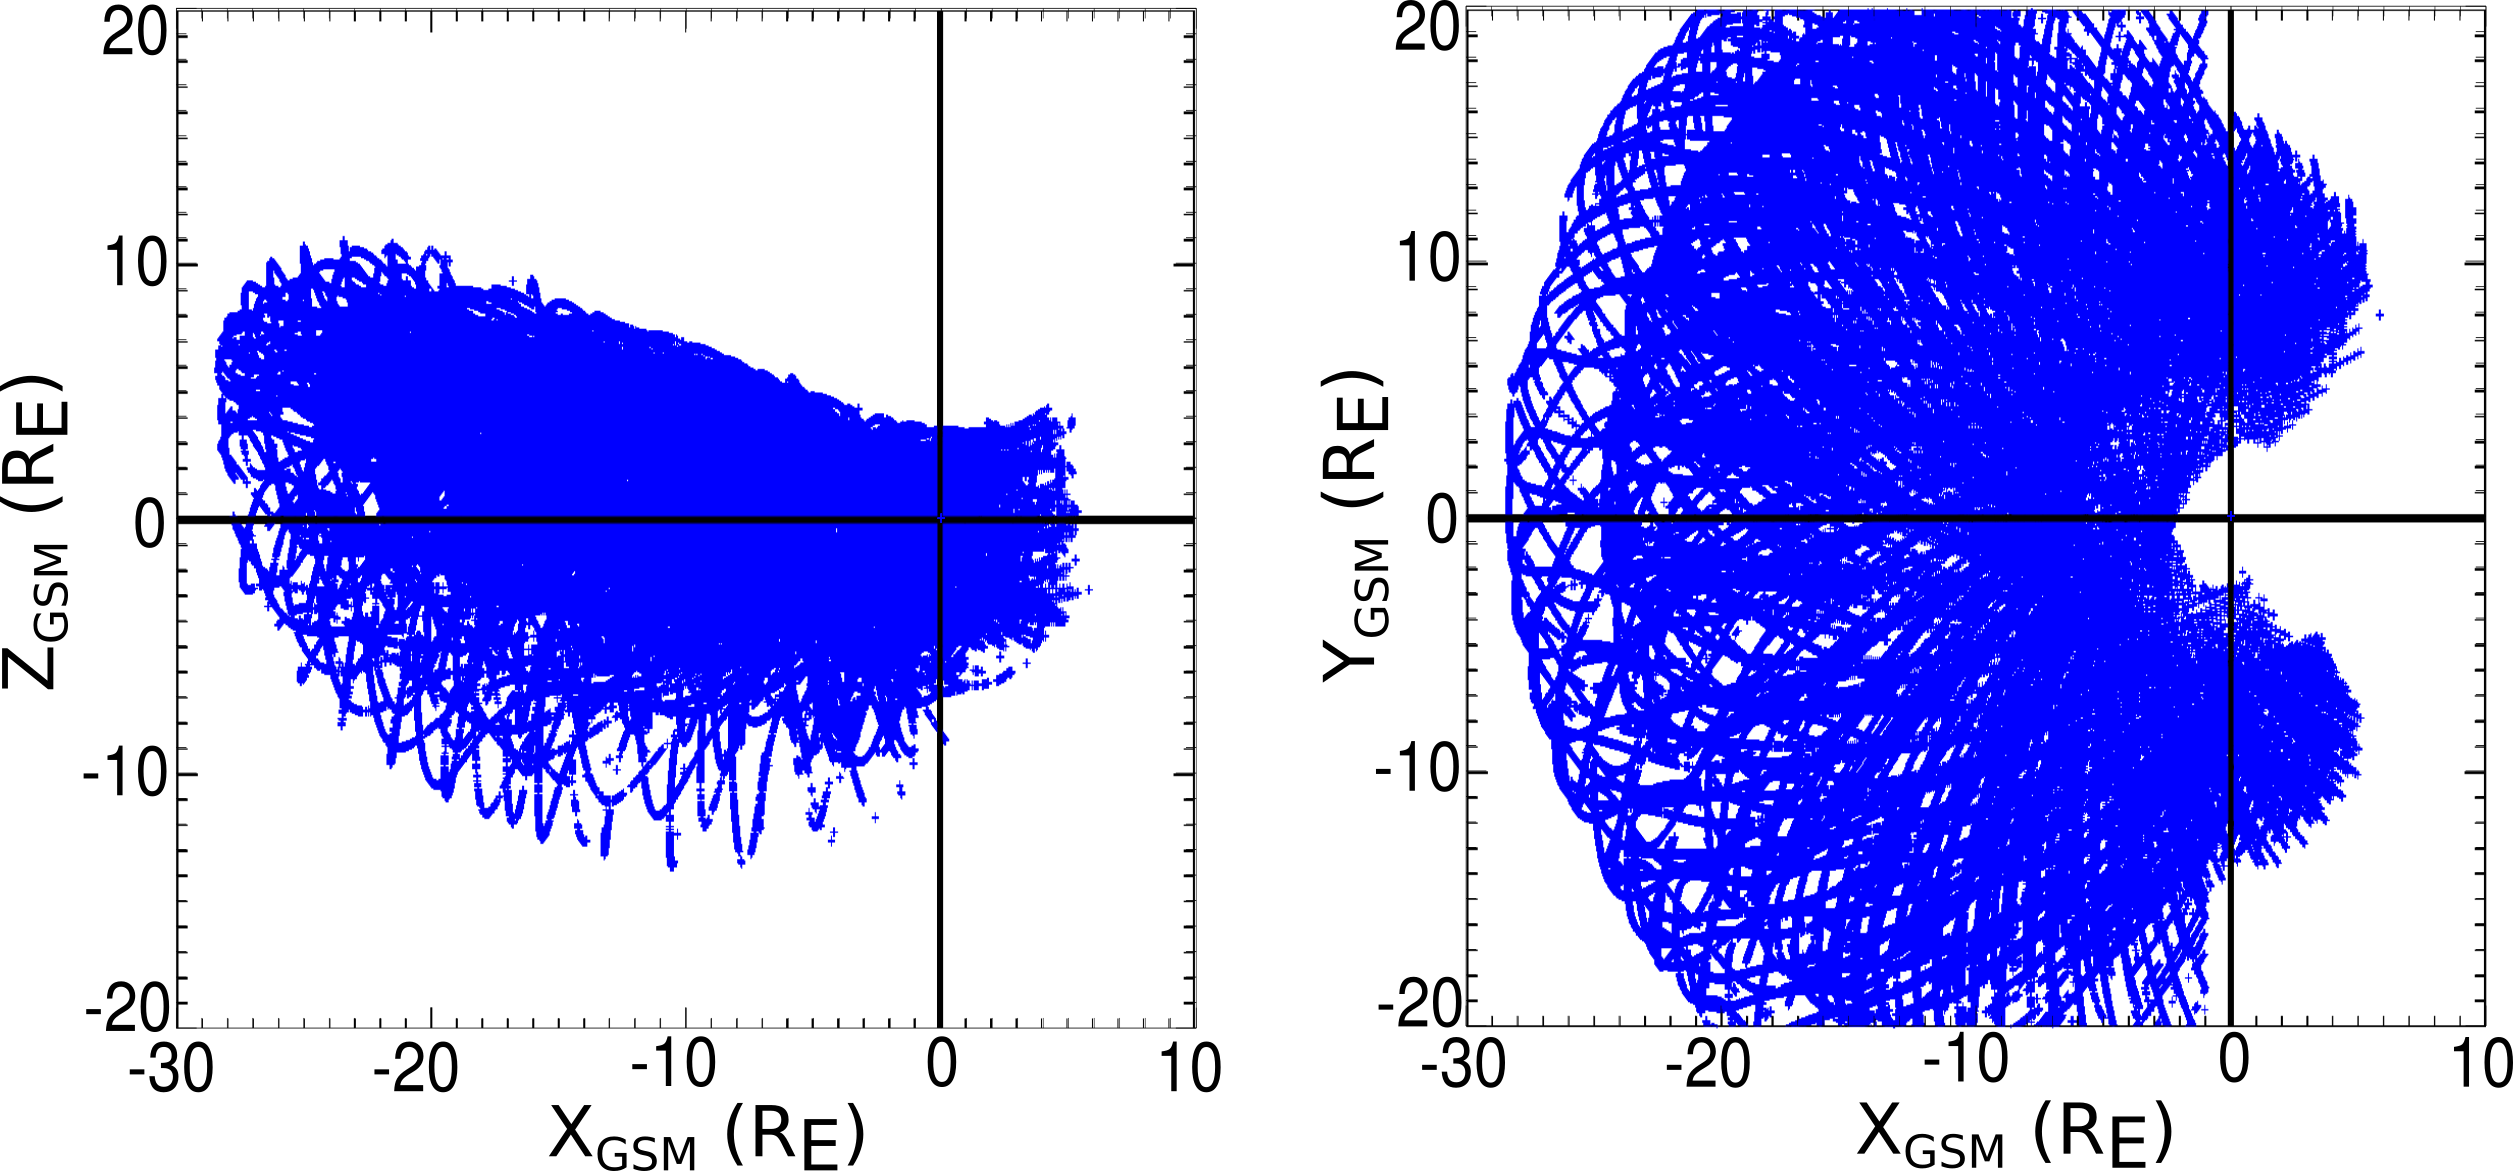

In [3]:
figure2_png_path ="/home/jliao/Downloads/ion_composition_figures/figure2/figure2.png"

display(Image(filename=figure2_png_path))

Figure 2. 2017-2020 orbital segments of MMS within the magnetosphere, in XZGSM, XYGSM projection. Dayside observation is taken out. 

## Figure 3

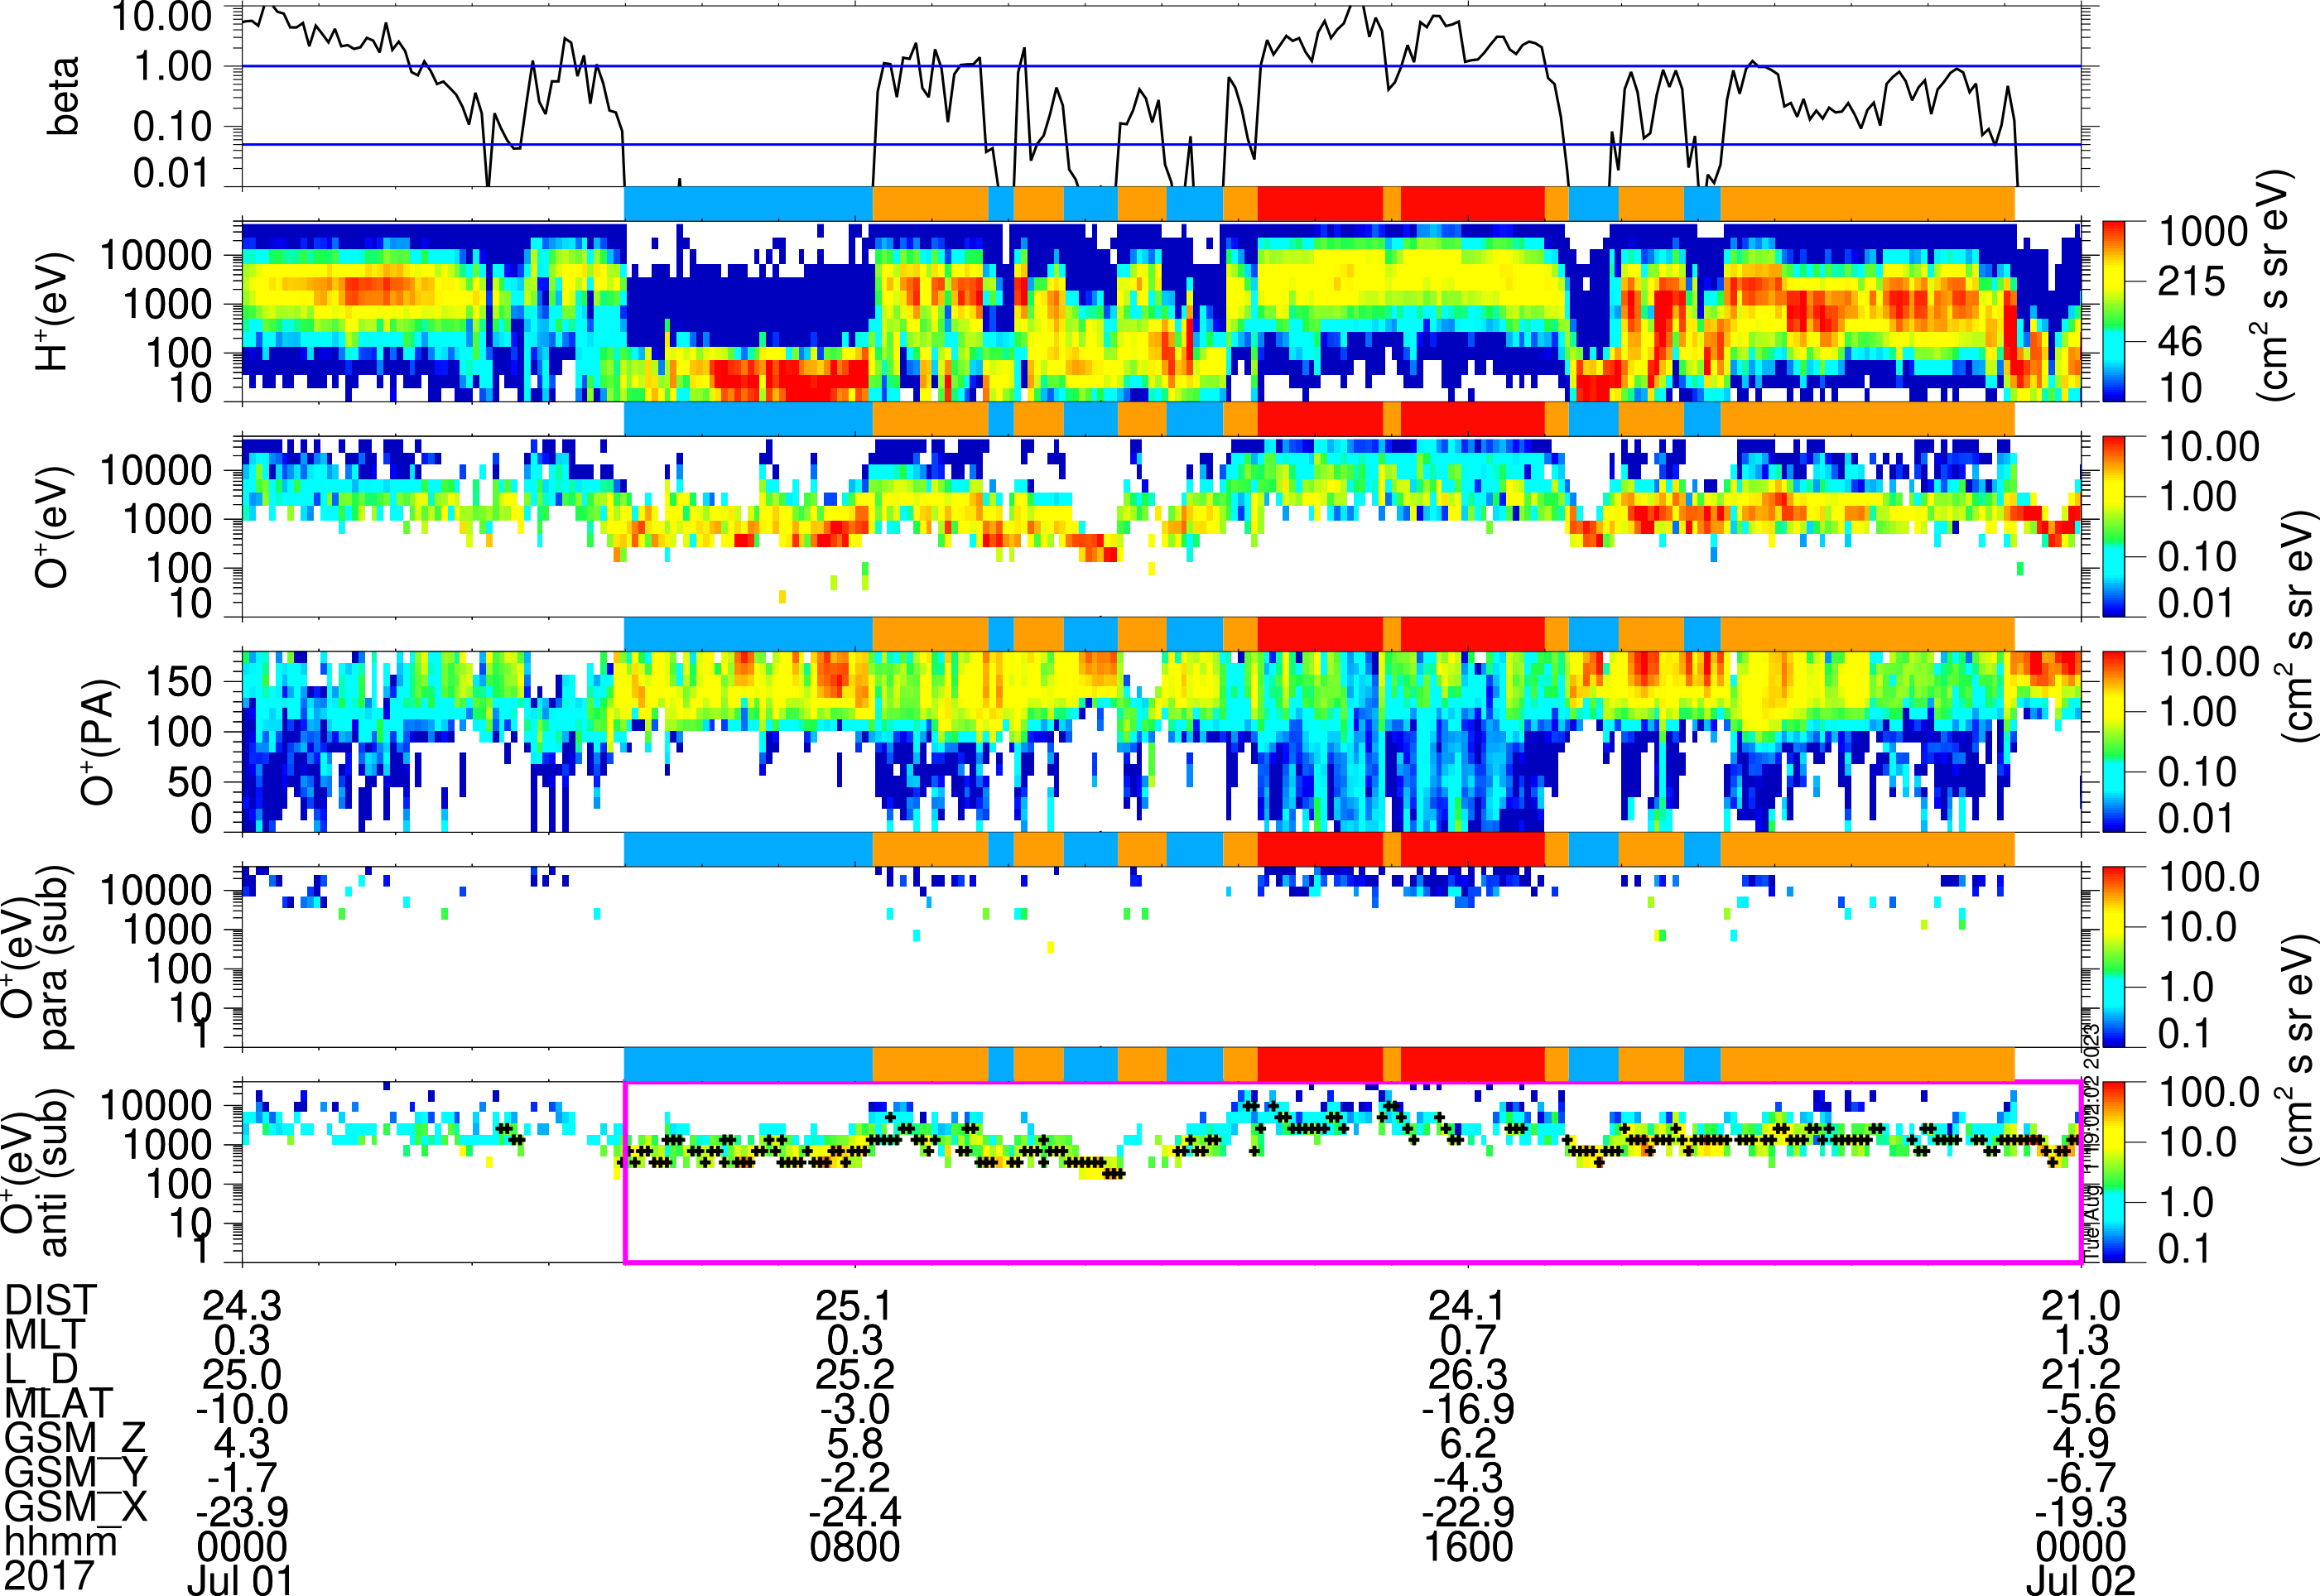

In [4]:
figure3_png_path ="/home/jliao/Downloads/ion_composition_figures/figure3/figure3.png"

display(Image(filename=figure3_png_path))

Figure 3. Observations of streaming O+. Panels from ton to down: Panel (a) is plasma beta. Panel (b) is proton energy spectra over all angles. Panel (c) is proton energy spectra over all angles. Panel (d) is the pitch angle of O+ at all energy. Panel (e) is the energy spectra of parallel O+ with pitch angle between 0 and 60 degrees. Panel (f) is the energy spectra of antiparallel O+  with pitch angle between 120 and 180. Black dots in panel (f) show the identified streaming O+. 


## Figure 4

Those are the correction ratio. Will be written in IDL code to apply the correction on the ratio.
lobe raio: [3.66667195 1.52173829 1.41666842 1.24404703 1.        ]
bl raio: [10.93334383  4.16667258  3.58333333  2.78946719  2.217392    1.73571492
  1.14285694  1.        ]
ps raio: [14.16664187  6.22221702  2.86956078  1.88888622  1.38169643  1.059524
  1.        ]
all raio: [10.93334383  6.22221702  3.42433538  2.50349508  1.83333333  1.53213006
  1.3284312   1.09756091  1.        ]


1

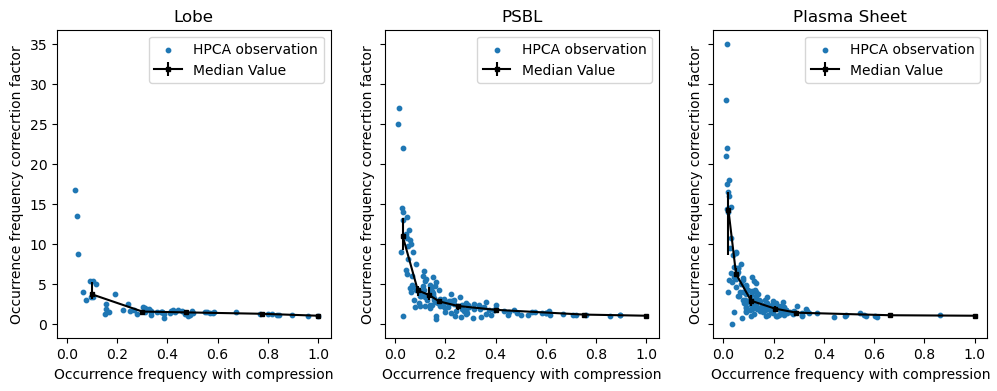

In [5]:
main_plot_path_1 = "idl_plots/output_sc1_sp3_300sec_multi_pa2_en2_subtraction_removebi_flux0.500.751.00_pap3.02.01.1/plots/plots_only_no_compression_ss27/"

non_sort_map_path_1 = main_plot_path_1+"non_sort_map"

main_plot_path_2 = "idl_plots/output_sc1_sp3_300sec_multi_pa2_en2_subtraction_reduced_removebi_flux0.500.751.00_pap3.02.01.1/plots/plots_only_no_compression_ss27/"

non_sort_map_path_2 = main_plot_path_2+"non_sort_map"

start_time_1 = '20180101'
end_time_1 = '20191231'

grid_str_1 = "grid_02"
direction_str_1 = "outflow"

com_lobe, nocom_lobe, ratio_lobe = ratio_correction_functions.read_data(non_sort_map_path_1, non_sort_map_path_2, grid_str_1, "Lobe", direction_str_1, start_time_1, end_time_1)

com_bl, nocom_bl, ratio_bl = ratio_correction_functions.read_data(non_sort_map_path_1, non_sort_map_path_2, grid_str_1, "BL", direction_str_1, start_time_1, end_time_1)

com_ps, nocom_ps, ratio_ps = ratio_correction_functions.read_data(non_sort_map_path_1, non_sort_map_path_2, grid_str_1, "PS", direction_str_1, start_time_1, end_time_1)

com_all = np.append(np.append(com_lobe,com_bl),com_ps)
nocom_all = np.append(np.append(nocom_lobe, nocom_bl), nocom_ps)
ratio_all = np.append(np.append(ratio_lobe, ratio_bl), ratio_ps)

# calculate the discrete ratios to use them as correctin factors 
x_low_lobe = np.array([0,0.2,0.4,0.55])
x_high_lobe = np.array([0.2,0.4,0.55,1])
avg_ratio_lobe, std_ratio_lobe, correction_x_lobe =  ratio_correction_functions.calculate_avg(com_lobe, ratio_lobe,x_low_lobe, x_high_lobe)
avg_ratio_lobe, std_ratio_lobe, correction_x_lobe = ratio_correction_functions.add_ratio_1(avg_ratio_lobe, std_ratio_lobe, correction_x_lobe)

x_low_bl = np.array([0,0.06,0.12,0.15,0.2,0.3,0.5])
x_high_bl = np.array([0.06,0.12,0.15,0.2,0.3,0.5,1])
avg_ratio_bl, std_ratio_bl, correction_x_bl = ratio_correction_functions.calculate_avg(com_bl, ratio_bl, x_low_bl, x_high_bl)
avg_ratio_bl, std_ratio_bl, correction_x_bl = ratio_correction_functions.add_ratio_1(avg_ratio_bl, std_ratio_bl, correction_x_bl)

x_low_ps = np.array([0,0.04,0.06,0.16,0.25,0.33])
x_high_ps = np.array([0.04,0.06,0.16,0.25,0.33,1])
avg_ratio_ps, std_ratio_ps, correction_x_ps = ratio_correction_functions.calculate_avg(com_ps, ratio_ps, x_low_ps, x_high_ps)
avg_ratio_ps, std_ratio_ps, correction_x_ps  = ratio_correction_functions.add_ratio_1(avg_ratio_ps, std_ratio_ps, correction_x_ps )

x_low_all = np.array([0,0.05,0.075,0.12,0.18,0.35,0.45,0.6])
x_high_all = np.array([0.05,0.075,0.12,0.18,0.35,0.45,0.6,1])
avg_ratio_all,std_ratio_all, correction_x_all = ratio_correction_functions.calculate_avg(com_all, ratio_all, x_low_all, x_high_all)
avg_ratio_all,std_ratio_all, correction_x_all = ratio_correction_functions.add_ratio_1(avg_ratio_all,std_ratio_all, correction_x_all )

print("Those are the correction ratio. Will be written in IDL code to apply the correction on the ratio.")
print("lobe raio:",avg_ratio_lobe)
print("bl raio:",avg_ratio_bl)
print("ps raio:",avg_ratio_ps)
print("all raio:",avg_ratio_all)

ratio_correction_functions.draw_correction_figures(com_lobe, ratio_lobe, correction_x_lobe,avg_ratio_lobe,  std_ratio_lobe, com_bl,ratio_bl, correction_x_bl, avg_ratio_bl, std_ratio_bl, com_ps,ratio_ps,correction_x_ps, avg_ratio_ps, std_ratio_ps )

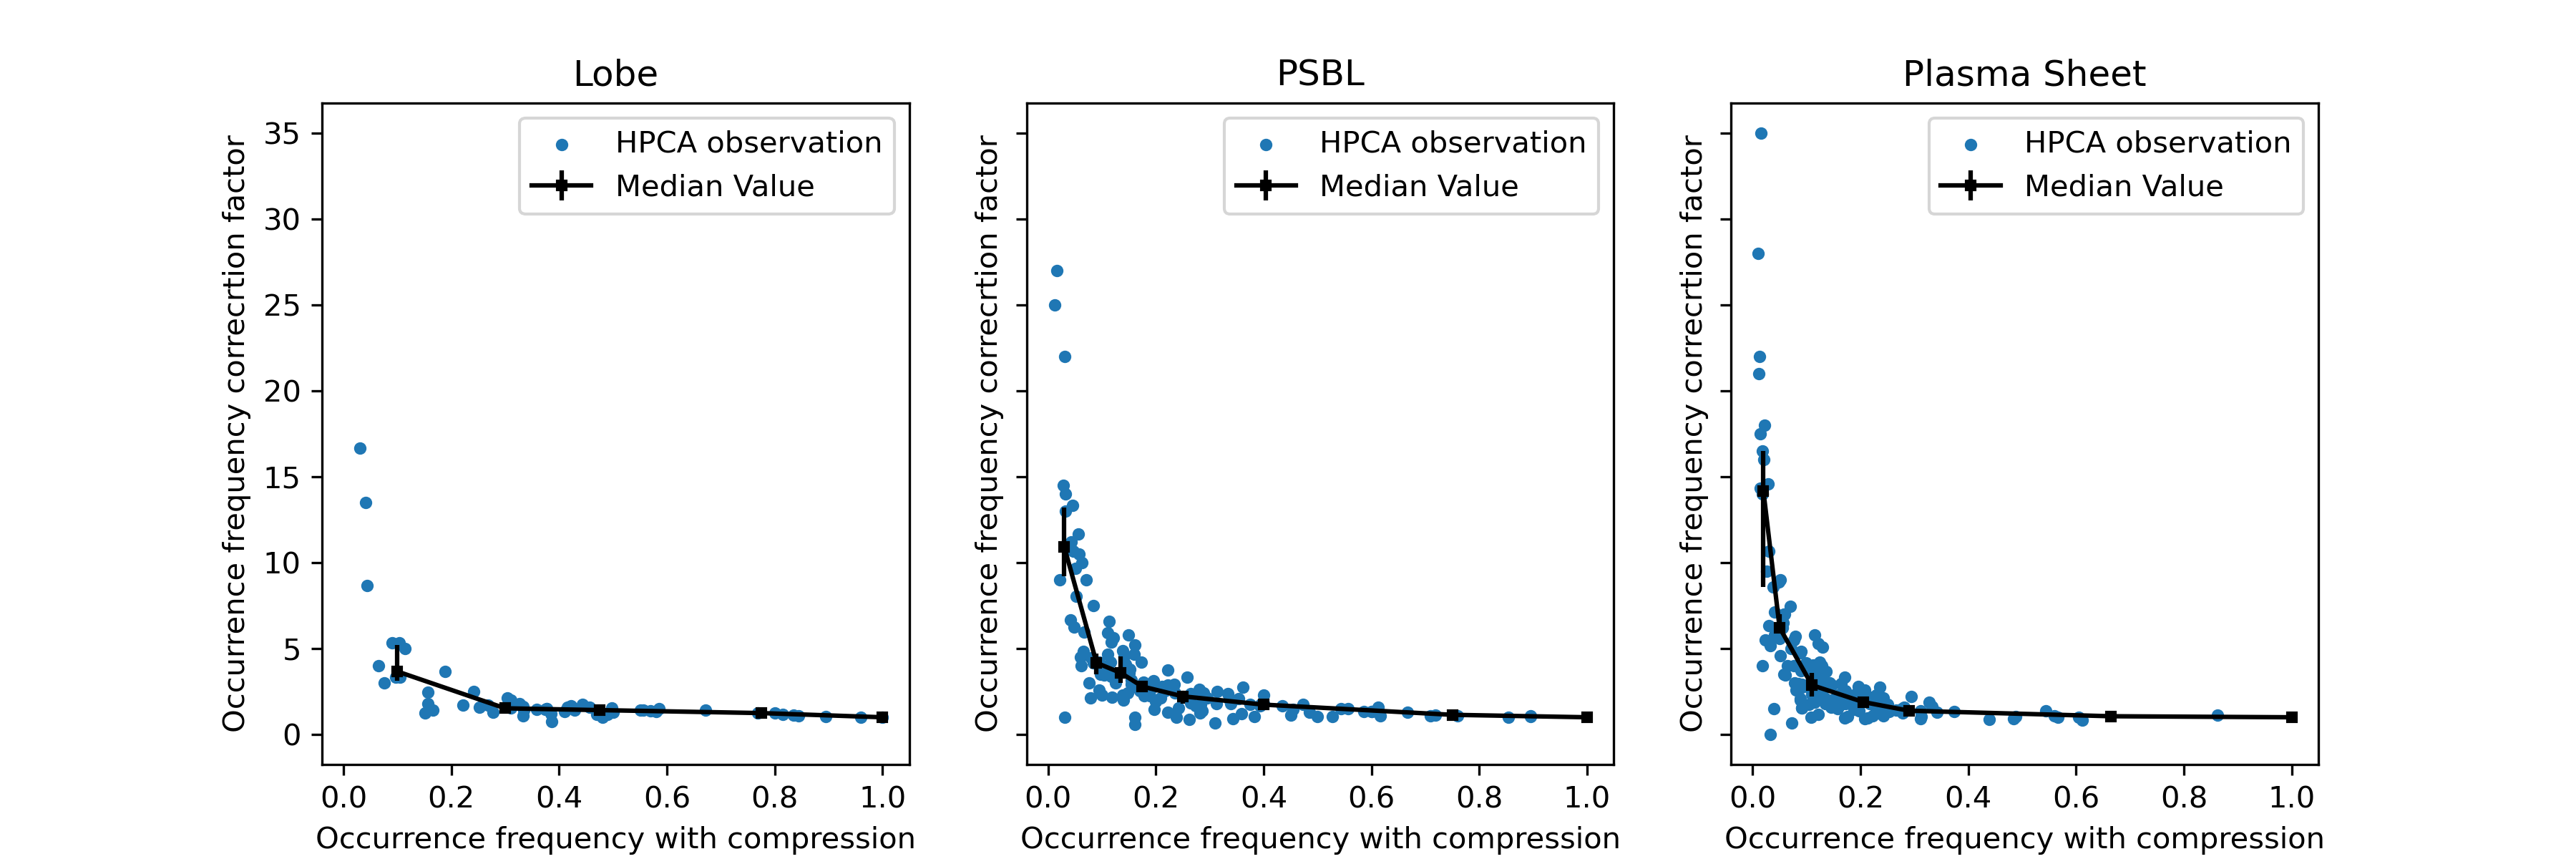

In [6]:
figure4_png_path ="/home/jliao/Downloads/ion_composition_figures/figure4/figure4.png"

display(Image(filename=figure4_png_path))

## Figure 5

In [7]:
main_plot_path = "idl_plots/output_sc1_sp3_300sec_multi_pa2_en2_subtraction_reduced_removebi_flux0.500.751.00_pap3.02.01.1/plots/plots_ss27/"

non_sort_map_path = main_plot_path + 'non_sort_map'
hemi_sort_map_path = main_plot_path+"hemi_sort_map"
kp_sort_map_path = main_plot_path+'kp_sort_map'
bx_sort_map_path = main_plot_path+'bx_sort_map'
f107_sort_map_path = main_plot_path+'F107_sort_map'

start_time = '20170101'
end_time = '20201231'
 
grid_str = "grid_02"
direction_str = "outflow"

correction_flag_str = 'corrected_'

ratio_type = "ratio_"

In [8]:
# images_array = [ non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM.png"
#     , non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
#     , non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# , non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM.png"
#     , non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
#     , non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ,
#      non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM.png"
#     , non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
#     , non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ]

# ipyplot.plot_images(images_array, img_width=300,show_url = False)

In [9]:
# # os.rename("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
# # os.replace("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
# # shutil.move("path/to/current/file.foo", "path/to/new/destination/for/file.foo")

# figure5_png_path ="/home/jliao/Downloads/ion_composition_figures/figure5/figure5.png"

# display(Image(filename=figure5_png_path))

<!-- Figure 5. Occurrence frequency maps of streaming O+ in XZGSM, XYGSM and YZGSM plane, in the lobe, PSBL and PS, with compression correcting factor applied.
 -->

## Figure 5

In [10]:
images_array = [ non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/slice/slice_zgrid_15/Lobe_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM_at_Y_GSM_-20.0_-5.0.png"
    ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/slice/slice_zgrid_10/Lobe_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM_at_Y_GSM_-5.0_5.0.png"
    ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/slice/slice_zgrid_15/Lobe_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM_at_Y_GSM_5.0_20.0.png"
    ,   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/slice/slice_zgrid_15/BL_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM_at_Y_GSM_-20.0_-5.0.png"
    ,   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/slice/slice_zgrid_10/BL_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM_at_Y_GSM_-5.0_5.0.png"
    ,   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/slice/slice_zgrid_15/BL_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM_at_Y_GSM_5.0_20.0.png" 
    ,   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/slice/slice_zgrid_15/PS_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM_at_Y_GSM_-20.0_-5.0.png"
    ,   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/slice/slice_zgrid_10/PS_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM_at_Y_GSM_-5.0_5.0.png"
    ,   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/slice/slice_zgrid_15/PS_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM_at_Y_GSM_5.0_20.0.png"
]

ipyplot.plot_images(images_array, img_width=300,show_url = False)



In [11]:
figure5_png_path ="/home/jliao/Downloads/ion_composition_figures/figure6/figure6.png"

#display(Image(filename=figure6_png_path))

Figure 6. Sliced occurrence frequency maps of streaming O+ in the XZgsm plane, divided by different Ygsm (from left to right: dawn -20 Re > Ygsm > -5 Re, center -5 Re < Ygsm < 5 Re and dusk 5 Re < Ygsm < 20 Re, and by different regions (from top to down: lobe, PSBL and PS), with compression correcting factor applied. 


## Figure 7

In [12]:
images_array = [
     hemi_sort_map_path+"/hemi_south/"+grid_str+"/south_Lobe_"+direction_str+"/events/2d/south_Lobe_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
    ,     
       hemi_sort_map_path+"/hemi_north/"+grid_str+"/north_Lobe_"+direction_str+"/events/2d/north_Lobe_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png" 
           ,   
    hemi_sort_map_path+"/hemi_south/"+grid_str+"/south_BL_"+direction_str+"/events/2d/south_BL_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
    , hemi_sort_map_path+"/hemi_north/"+grid_str+"/north_BL_"+direction_str+"/events/2d/north_BL_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
      ,   hemi_sort_map_path+"/hemi_south/"+grid_str+"/south_PS_"+direction_str+"/events/2d/south_PS_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
        ,    hemi_sort_map_path+"/hemi_north/"+grid_str+"/north_PS_"+direction_str+"/events/2d/north_PS_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png" 
]

ipyplot.plot_images(images_array, img_width=400,show_url = False)


In [36]:
figure7_png_path ="/home/jliao/Downloads/ion_composition_figures/figure7/figure7.png"

# display(Image(filename=figure7_png_path))

Figure 7. Sliced Occurrence frequency maps of streaming O+ in XYGSM plane, divided by different hemisphere (left column is south hemisphere and right column is for north hemisphere), and by different regions (from top to down: lobe, PSBL and PS), with compression correcting factor applied.

## Figure 8

In [14]:
images_array = [
          non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"_imfBy_-25_0__corrected_ratio_"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
 ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"_imfBy_0_25__corrected_ratio_"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
          ,      non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"_imfBy_-25_0__corrected_ratio_"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"

    ,   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"_imfBy_0_25__corrected_ratio_"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png",  non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"_imfBy_-25_0__corrected_ratio_"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"

      ,   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"_imfBy_0_25__corrected_ratio_"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
]

ipyplot.plot_images(images_array, img_width=400,show_url = False)



In [37]:
figure8_png_path ="/home/jliao/Downloads/ion_composition_figures/figure8/figure8.png"

# display(Image(filename=figure8_png_path))

Figure 8. Occurrence frequency maps of streaming O+ in YZGSM plane, sorted by different IMF By (left column is for IMF By < 0 and right column is for IMF By > 0), inside lobe and PSBL regions (upper and bottom rows), with compression correcting factors applied. 


## Figure 9


In [16]:
images_array = [
non_sort_map_path_1+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"__"+"median_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    , non_sort_map_path_1+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"__"+"median_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    , non_sort_map_path_1+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"__"+"median_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    ,    
 non_sort_map_path_2+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"__"+"median_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    , non_sort_map_path_2+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"__"+"median_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    , non_sort_map_path_2+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"__"+"median_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    ,      
    non_sort_map_path_1+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"__"+"minimum_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    , non_sort_map_path_1+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"__"+"minimum_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    , non_sort_map_path_1+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"__"+"minimum_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    ,    
 non_sort_map_path_2+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"__"+"minimum_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    , non_sort_map_path_2+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"__"+"minimum_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    , non_sort_map_path_2+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"__"+"minimum_energy__"+start_time_1+"_to_"+end_time_1+"_X_GSM_vs_Y_GSM.png"
    
]

ipyplot.plot_images(images_array, img_width=300, show_url = False)

In [17]:
figure9_png_path ="/home/jliao/Downloads/ion_composition_figures/figure9/figure9.png"

#display(Image(filename=figure9_png_path))

Figure 9. Median energy and minimum energy maps with data during the non-compressed time period during 2018-2019, with and without simulated compression scheme.


## Figure 10


In [18]:
images_array = [
    non_sort_map_path+"/"+grid_str+"/Tail_"+direction_str+"/events/2d/Tail_"+direction_str+"__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Beta.png"
    ,     non_sort_map_path+"/"+grid_str+"/Tail_"+direction_str+"/energy/2d/Tail_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Beta.png"
        ,     non_sort_map_path+"/"+grid_str+"/Tail_"+direction_str+"/energy/2d/Tail_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Beta.png"
]

ipyplot.plot_images(images_array, img_width=300, show_url = False)

In [19]:
figure10_png_path ="/home/jliao/Downloads/ion_composition_figures/figure10/figure10.png"

#display(Image(filename=figure11_png_path))

Figure 11. Median and minimum energy masp of streaming O+ in plasma beta vs Xgsm space.


## Figure 11

In [20]:
images_array = [
#      non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM.png"
#     , 
    non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
#     , non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
#         , non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM.png"
    , non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"

#     , non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
#         , non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM.png"
    ,non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"

#     , non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
]

ipyplot.plot_images(images_array, img_width=300, show_url=False)

In [21]:
figure11_png_path ="/home/jliao/Downloads/ion_composition_figures/figure11/figure11.png"

#display(Image(filename=figure10_png_path))

Figure 11. Median energy maps of streaming O+ in XZGSM, YZGSM, and XYGSM projections for different regions.


## Figure 12

In [22]:
images_array = [
#      non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM.png"
#     , non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
#         , 
    non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
#     , 
#     non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM.png"
#     , non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
     ,
    non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
#     ,  
#     non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Z_GSM.png"   
#     , non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_Y_GSM_vs_Z_GSM.png"
    , non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"

]

ipyplot.plot_images(images_array, img_width=300,show_url=False)

In [23]:
figure12_png_path ="/home/jliao/Downloads/ion_composition_figures/figure12/figure12.png"

#display(Image(filename=figure12_png_path))

Figure 12. Minimum energy maps of streaming O+ in XZgsm, XYgsm and YZgsm plane


## Figure 13



In [24]:
images_array = [
non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"_en_1_100__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"      
    ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"_en_100_1000__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
       ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"_en_1000_3000__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
       ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"_en_3000_40000__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"

    ,   
    non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"_en_1_100__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"      ,   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"_en_100_1000__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
      ,   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"_en_1000_3000__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
      ,   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"_en_3000_40000__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
    ,   
    non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"_en_1_100__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png" 
    ,   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"_en_100_1000__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
        ,   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"_en_1000_3000__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
    ,   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"_en_3000_40000__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"

]

ipyplot.plot_images(images_array, img_width=228,show_url=False)



In [25]:
images_array = [
non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/total_density/2d/Lobe_"+direction_str+"_en_1_100__corrected_median_total_density__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"      
    ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/total_density/2d/Lobe_"+direction_str+"_en_100_1000__corrected_median_total_density__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
       ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/total_density/2d/Lobe_"+direction_str+"_en_1000_3000__corrected_median_total_density__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
       ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/total_density/2d/Lobe_"+direction_str+"_en_3000_40000__corrected_median_total_density__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"

,non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/density_ratio/2d/Lobe_"+direction_str+"_en_1_100__corrected_median_density_ratio__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"      
    ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/density_ratio/2d/Lobe_"+direction_str+"_en_100_1000__corrected_median_density_ratio__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
       ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/density_ratio/2d/Lobe_"+direction_str+"_en_1000_3000__corrected_median_density_ratio__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
       ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/density_ratio/2d/Lobe_"+direction_str+"_en_3000_40000__corrected_median_density_ratio__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,
    non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/total_velocity/2d/Lobe_"+direction_str+"_en_1_100__corrected_median_total_velocity__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"      
    ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/total_velocity/2d/Lobe_"+direction_str+"_en_100_1000__corrected_median_total_velocity__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
       ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/total_velocity/2d/Lobe_"+direction_str+"_en_1000_3000__corrected_median_total_velocity__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
       ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/total_velocity/2d/Lobe_"+direction_str+"_en_3000_40000__corrected_median_total_velocity__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"

    
]

ipyplot.plot_images(images_array, img_width=228,show_url=False)



In [26]:
figure13_png_path ="/home/jliao/Downloads/ion_composition_figures/figure13/figure13.png"

#display(Image(filename=figure13_png_path))

Figure 13. Occurrence frequency maps of streaming O+ at different energy ranges (left to right: 1eV ~ 100 eV, 100eV ~ 1keV, 1keV ~ 40keV) and in different regions (top to down: lobe, PSBL and PS). 


-------------------

# Other figures

## F10.7 impacts

In [38]:
# images_array = [
#     f107_sort_map_path+"/F107_lt_100/"+grid_str+"/F107_lt_100_"+direction_str+"/events/2d/F107_lt_100_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ,     f107_sort_map_path+"/F107_lt_100/"+grid_str+"/F107_lt_100_"+direction_str+"/energy/2d/F107_lt_100_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
#     ,  f107_sort_map_path+"/F107_lt_100/"+grid_str+"/F107_lt_100_"+direction_str+"/energy/2d/F107_lt_100_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ,   f107_sort_map_path+"/F107_ge_100/"+grid_str+"/F107_ge_100_"+direction_str+"/events/2d/F107_ge_100_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ,  f107_sort_map_path+"/F107_ge_100/"+grid_str+"/F107_ge_100_"+direction_str+"/energy/2d/F107_ge_100_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ,  f107_sort_map_path+"/F107_ge_100/"+grid_str+"/F107_ge_100_"+direction_str+"/energy/2d/F107_ge_100_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ]

# ipyplot.plot_images(images_array, img_width=300, show_url = False)

In [40]:
# images_array = [
#     f107_sort_map_path+"/F107_lt_70/"+grid_str+"/F107_lt_70_"+direction_str+"/events/2d/F107_lt_70_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ,     f107_sort_map_path+"/F107_lt_70/"+grid_str+"/F107_lt_70_"+direction_str+"/energy/2d/F107_lt_70_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
#     ,  f107_sort_map_path+"/F107_lt_70/"+grid_str+"/F107_lt_70_"+direction_str+"/energy/2d/F107_lt_70_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ,   f107_sort_map_path+"/F107_ge_70/"+grid_str+"/F107_ge_70_"+direction_str+"/events/2d/F107_ge_70_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ,  f107_sort_map_path+"/F107_ge_70/"+grid_str+"/F107_ge_70_"+direction_str+"/energy/2d/F107_ge_70_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ,  f107_sort_map_path+"/F107_ge_70/"+grid_str+"/F107_ge_70_"+direction_str+"/energy/2d/F107_ge_70_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
# ]

# ipyplot.plot_images(images_array, img_width=300, show_url = False)

## kp impacts

In [29]:
images_array = [
    kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_"+direction_str+"/events/2d/Kplt_2_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
, kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_"+direction_str+"/energy/2d/Kplt_2_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
    ,  kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_"+direction_str+"/energy/2d/Kplt_2_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  
    kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_"+direction_str+"/events/2d/Kpge_2_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_"+direction_str+"/energy/2d/Kpge_2_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_"+direction_str+"/energy/2d/Kpge_2_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
]

ipyplot.plot_images(images_array, img_width=300, show_url = False)

In [30]:
images_array = [
    kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_Lobe_"+direction_str+"/events/2d/Kplt_2_Lobe_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
, kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_Lobe_"+direction_str+"/energy/2d/Kplt_2_Lobe_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
    ,  kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_Lobe_"+direction_str+"/energy/2d/Kplt_2_Lobe_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  
    kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_Lobe_"+direction_str+"/events/2d/Kpge_2_Lobe_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_Lobe_"+direction_str+"/energy/2d/Kpge_2_Lobe_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_Lobe_"+direction_str+"/energy/2d/Kpge_2_Lobe_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,
    kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_BL_"+direction_str+"/events/2d/Kplt_2_BL_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
, kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_BL_"+direction_str+"/energy/2d/Kplt_2_BL_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
    ,  kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_BL_"+direction_str+"/energy/2d/Kplt_2_BL_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  
    kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_BL_"+direction_str+"/events/2d/Kpge_2_BL_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_BL_"+direction_str+"/energy/2d/Kpge_2_BL_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_BL_"+direction_str+"/energy/2d/Kpge_2_BL_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
    ,
        kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_PS_"+direction_str+"/events/2d/Kplt_2_PS_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
, kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_PS_"+direction_str+"/energy/2d/Kplt_2_PS_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
    ,  kp_sort_map_path+"/kp_lt_2/"+grid_str+"/Kplt_2_PS_"+direction_str+"/energy/2d/Kplt_2_PS_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  
    kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_PS_"+direction_str+"/events/2d/Kpge_2_PS_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_PS_"+direction_str+"/energy/2d/Kpge_2_PS_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,  kp_sort_map_path+"/kp_ge_2/"+grid_str+"/Kpge_2_PS_"+direction_str+"/energy/2d/Kpge_2_PS_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
]

ipyplot.plot_images(images_array, img_width=300, show_url = False)


## Solar wind velocity impacts

In [31]:
images_array = [ 
    non_sort_map_path+"/"+grid_str+"/"+direction_str+"/events/2d/"+direction_str+"_swV_0_450_corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
 ,   non_sort_map_path+"/"+grid_str+"/"+direction_str+"/energy/2d/"+direction_str+"_swV_0_450_"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png",   non_sort_map_path+"/"+grid_str+"/"+direction_str+"/energy/2d/"+direction_str+"_swV_0_450_"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,    non_sort_map_path+"/"+grid_str+"/"+direction_str+"/events/2d/"+direction_str+"_swV_450_900_corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,
non_sort_map_path+"/"+grid_str+"/"+direction_str+"/energy/2d/"+direction_str+"_swV_450_900_"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,   non_sort_map_path+"/"+grid_str+"/"+direction_str+"/energy/2d/"+direction_str+"_swV_450_900_"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
]

ipyplot.plot_images(images_array, img_width=300, show_url = False)

In [32]:
images_array = [ 
    non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"_swV_0_450_corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
 ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"_swV_0_450_"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png",   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"_swV_0_450_"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,    non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"_swV_450_900_corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,
non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"_swV_450_900_"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"_swV_450_900_"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
    , non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"_swV_0_450_corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
 ,   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"_swV_0_450_"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png",   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"_swV_0_450_"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,    non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"_swV_450_900_corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,
non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"_swV_450_900_"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"_swV_450_900_"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
                , non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"_swV_0_450_corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
 ,   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"_swV_0_450_"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png",   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"_swV_0_450_"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,    non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"_swV_450_900_corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,
non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"_swV_450_900_"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"_swV_450_900_"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
]

ipyplot.plot_images(images_array, img_width=300, show_url = False)

## Solar wind pressure impacts


In [33]:
images_array = [
   non_sort_map_path+"/"+grid_str+"/"+direction_str+"/events/2d/"+direction_str+"_swP_0_2__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,    non_sort_map_path+"/"+grid_str+"/"+direction_str+"/energy/2d/"+direction_str+"_swP_0_2__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png",   non_sort_map_path+"/"+grid_str+"/"+direction_str+"/energy/2d/"+direction_str+"_swP_0_2__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"

,
      non_sort_map_path+"/"+grid_str+"/"+direction_str+"/events/2d/"+direction_str+"_swP_2_20__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png",   non_sort_map_path+"/"+grid_str+"/"+direction_str+"/energy/2d/"+direction_str+"_swP_2_20__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png",   non_sort_map_path+"/"+grid_str+"/"+direction_str+"/energy/2d/"+direction_str+"_swP_2_20__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"


]

ipyplot.plot_images(images_array, img_width=300, show_url = False)


In [34]:
images_array = [ 
    non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"_swP_0_2__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
 ,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"_swP_0_2__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png",   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"_swP_0_2__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,    non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/events/2d/Lobe_"+direction_str+"_swP_2_20__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,
non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"_swP_2_20__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,   non_sort_map_path+"/"+grid_str+"/Lobe_"+direction_str+"/energy/2d/Lobe_"+direction_str+"_swP_2_20__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
    , non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"_swP_0_2__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
 ,   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"_swP_0_2__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png",   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"_swP_0_2__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,    non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/events/2d/BL_"+direction_str+"_swP_2_20__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,
non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"_swP_2_20__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,   non_sort_map_path+"/"+grid_str+"/BL_"+direction_str+"/energy/2d/BL_"+direction_str+"_swP_2_20__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
                , non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"_swP_0_2__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
 ,   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"_swP_0_2__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png",   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"_swP_0_2__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,    non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/events/2d/PS_"+direction_str+"_swP_2_20__corrected_ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,
non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"_swP_2_20__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
,   non_sort_map_path+"/"+grid_str+"/PS_"+direction_str+"/energy/2d/PS_"+direction_str+"_swP_2_20__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
]

ipyplot.plot_images(images_array, img_width=300, show_url = False)

## Storm impacts 

In [39]:
# images_array = [
    
#      non_sort_map_path+"/"+grid_str+"/nonstorm_time_"+direction_str+"/events/2d/nonstorm_time_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
#     , non_sort_map_path+"/"+grid_str+"/nonstorm_time_"+direction_str+"/energy/2d/nonstorm_time_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
#     ,  non_sort_map_path+"/"+grid_str+"/nonstorm_time_"+direction_str+"/energy/2d/nonstorm_time_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"

    
#  ,  non_sort_map_path+"/"+grid_str+"/storm_time_"+direction_str+"/events/2d/storm_time_"+direction_str+"__"+ correction_flag_str+"ratio_"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
#      ,  non_sort_map_path+"/"+grid_str+"/storm_time_"+direction_str+"/energy/2d/storm_time_"+direction_str+"__"+correction_flag_str+"median_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"
#  ,  non_sort_map_path+"/"+grid_str+"/storm_time_"+direction_str+"/energy/2d/storm_time_"+direction_str+"__"+correction_flag_str+"minimum_energy__"+start_time+"_to_"+end_time+"_X_GSM_vs_Y_GSM.png"

# ]

# ipyplot.plot_images(images_array, img_width=300, show_url = False)